# Rocket to the Moon

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from physics.orbits import pos_earth_moon, orbital_period, compute_L2, energy
from integrator import evolve
from plotting import plot_trajectories

### Time Calculations

In [3]:
T = orbital_period() #s
time_step = 10 #s
max_time = 2*T #s
time = np.arange(0, max_time, time_step) #s

### Calculate L2

In [4]:
pos_L2, v_L2 = compute_L2()

### Calculate rockets position and velocity by solving the ODE

Using Taylor integrator
Using RK4 integrator


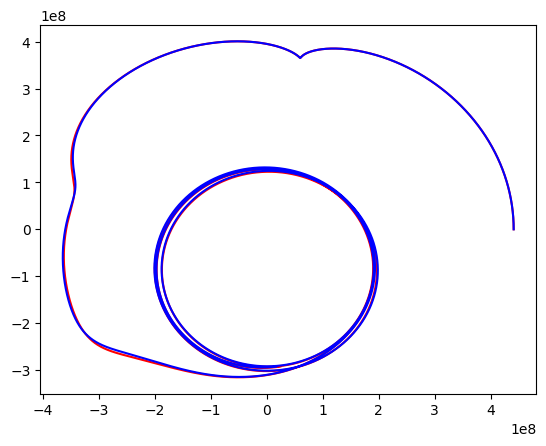

In [5]:
r_rocket_barycenter, v_rocket_barycenter = evolve(pos_L2, v_L2, time, time_step, method='Taylor')
r,v = evolve(pos_L2, v_L2, time, time_step, method='RK4')

plt.plot(r_rocket_barycenter[0], r_rocket_barycenter[1], label='Rocket (Barycenter Frame)', color='red')
plt.plot(r[0], r[1], label='Rocket (Inertial Frame)', color='blue')
plt.show()

### Calcuate Earth and Moons Position

In [6]:
r_earth_barycenter, r_moon_barycenter = pos_earth_moon(time)

### Plot the results

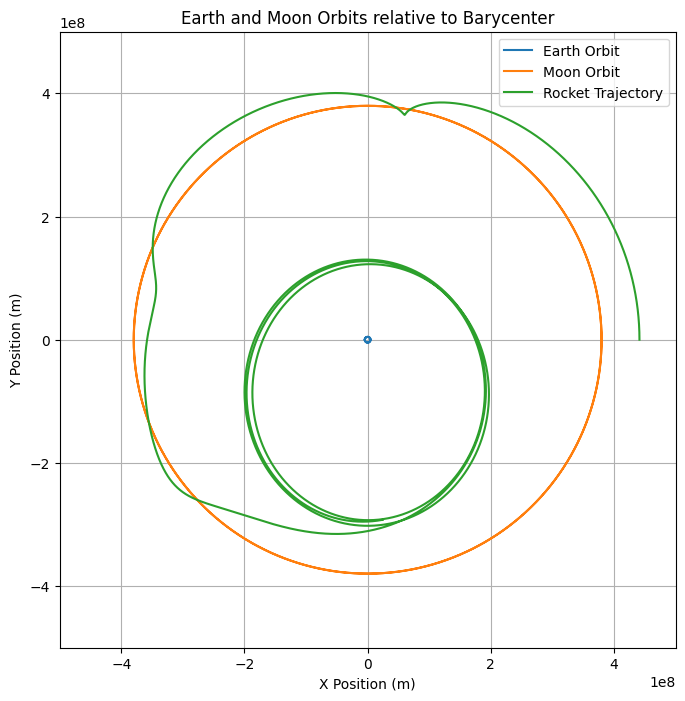

In [7]:
plot_trajectories(r_earth_barycenter, r_moon_barycenter, r_rocket_barycenter)

In [ ]:
E_rocket = energy(r_rocket_barycenter,1,v_rocket_barycenter,r_earth_barycenter,r_moon_barycenter)

AxisError: axis 0 is out of bounds for array of dimension 0

C:\Users\scoul\AppData\Local\Temp\ipykernel_16448\3794692548.py:2: RuntimeWarning: divide by zero encountered in divide
  below_99 = np.where(E_rocket / E_rocket[0] < 0.99)[0]
C:\Users\scoul\AppData\Local\Temp\ipykernel_16448\3794692548.py:2: RuntimeWarning: invalid value encountered in divide
  below_99 = np.where(E_rocket / E_rocket[0] < 0.99)[0]
C:\Users\scoul\AppData\Local\Temp\ipykernel_16448\3794692548.py:11: RuntimeWarning: divide by zero encountered in divide
  ax.plot(time / T, E_rocket / E_rocket[0])
C:\Users\scoul\AppData\Local\Temp\ipykernel_16448\3794692548.py:11: RuntimeWarning: invalid value encountered in divide
  ax.plot(time / T, E_rocket / E_rocket[0])


Rocket energy drops below 99% of initial energy at t = 10.0 s


ValueError: x and y must have same first dimension, but have shapes (471458,) and (2, 471458)

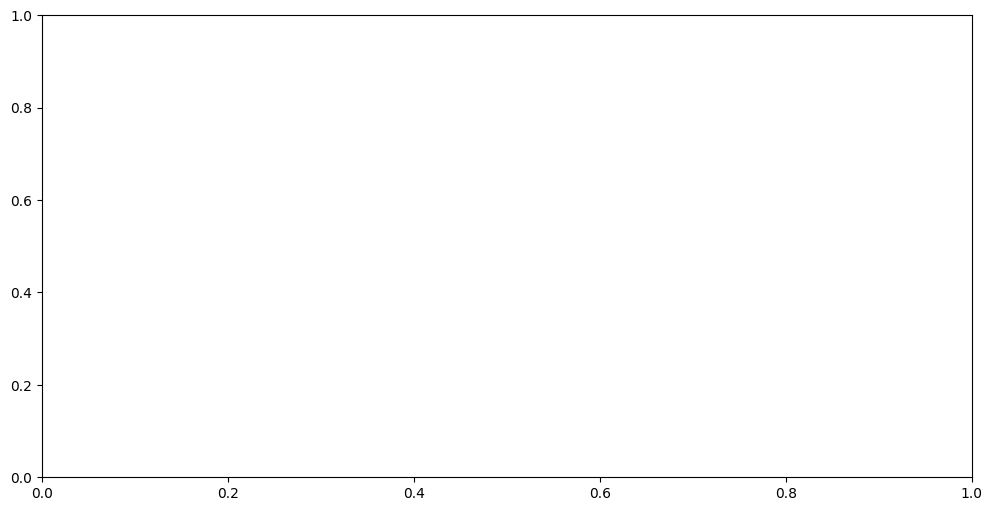

In [ ]:
#Find where energy drops below 99% of initial energy
below_99 = np.where(E_rocket / E_rocket[0] < 0.99)[0]
if len(below_99) > 0:
    first_below_99 = below_99[0]
    time_below_99 = time[first_below_99]
    print(f"Rocket energy drops below 99% of initial energy at t = {time_below_99} s")
else:
    print("Rocket energy does not drop below 99% of initial energy in the simulated time.")

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(time / T, E_rocket / E_rocket[0])
ax.axhline(y=0.99, color='k', linestyle='--', linewidth=1)  # horizontal line at value 0.99%
ax.axvline(x=time_below_99/T, color='r', linestyle='--', linewidth=1)  # vertical line at time when energy drops below 99%
ax.set_xlabel("Time (normalized by orbital period)")
ax.set_ylabel("Normalized Energy")
ax.set_title("Rocket Energy Over Time")
plt.show()
